In [2]:
import pandas as pd

import metricio

In [3]:
meta, data = metricio.read_metrics('data.txt')

In [4]:
# import csv
# with open('data_copy.csv', 'w+', encoding='UTF-8') as file:
#     for key, value in data.items():
#         csv.writer(file, value)

In [5]:
data_dict = {key: [features[meta.index(key)] for features in data.values()] for key in meta}
my_data = pd.DataFrame(data_dict)
keys = data.keys()
my_data = my_data.rename(dict(zip(range(len(keys)), keys)), axis=0)

In [6]:
my_data.to_csv('data_copy.csv')

In [12]:
% matplotlib inline
import matplotlib as plt
import seaborn as sns

UsageError: Line magic function `%` not found.


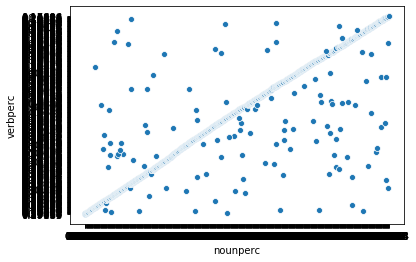

In [14]:
sns.scatterplot(x='nounperc', y='verbperc', data=my_data)

/home/kafree/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


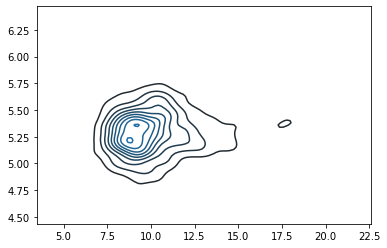